### **Session 10: Image Classification**

**Image Classification Overview:**
Image classification involves categorizing images into predefined classes. It is a fundamental task in computer vision and has applications in various fields, including medical imaging, autonomous driving, and social media.

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*CV81vQUQTq-ko_ER9gvqjg.png)

**Key Concepts:**
1. **Dataset**: Collection of labeled images used to train and evaluate the model.
2. **Model**: Neural network architecture used for image classification.
3. **Training**: Process of learning the parameters of the model using a training dataset.
4. **Evaluation**: Assessing the performance of the trained model on a separate dataset (validation/test set).
5. **Metrics**: Accuracy, precision, recall, F1-score, etc., used to measure the model's performance.

**Steps in Image Classification:**
1. **Data Preparation**:
   - Load the dataset.
   - Preprocess the images (resizing, normalization, data augmentation).

2. **Model Selection**:
   - Choose an appropriate neural network architecture (e.g., CNNs, ResNet).

3. **Training the Model**:
   - Compile the model with an optimizer, loss function, and evaluation metrics.
   - Train the model using the training dataset.
   - Monitor the training process and validate the model on the validation dataset.

4. **Evaluating the Model**:
   - Test the model on a separate test dataset.
   - Analyze the performance using various metrics.

**Common Datasets for Image Classification:**
- **MNIST**: Handwritten digits (10 classes).
- **CIFAR-10**: 60,000 32x32 color images in 10 classes.
- **ImageNet**: Over 14 million images in 1000 classes.

**Model Architectures:**
1. **Convolutional Neural Networks (CNNs)**:
   - Layers: Convolutional, Pooling, Fully Connected, Dropout.
   - Popular architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet.

2. **Residual Networks (ResNet)**:
   - Use of identity and convolutional blocks.
   - Solves the vanishing gradient problem using skip connections.

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-08-07 09:40:46--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.29.22.44, 2600:1406:bc00:a81::317f, 2600:1406:bc00:a8e::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.29.22.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   136MB/s    in 7.3s    

2024-08-07 09:40:53 (108 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip -q kagglecatsanddogs_5340.zip

there are currupted images in this dataset

In [ ]:
import os
from PIL import Image

def is_image_valid(image_path):
    try:
        img = Image.open(image_path)
        img.verify()  # Verify that it is, in fact, an image
        return True
    except (IOError, SyntaxError) as e:
        print(f"Bad file: {image_path}")
        return False

def remove_corrupted_images(base_dir):
    for folder_name in ['Cat', 'Dog']:
        folder_path = os.path.join(base_dir, folder_name)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if not is_image_valid(file_path):
                os.remove(file_path)

# Remove corrupted images
data_dir = 'PetImages/'
remove_corrupted_images(data_dir)


Bad file: PetImages/Cat/Thumbs.db
Bad file: PetImages/Cat/666.jpg
Bad file: PetImages/Dog/Thumbs.db
Bad file: PetImages/Dog/11702.jpg


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [ ]:
import os
print(len(os.listdir('PetImages/Cat')))
print(len(os.listdir('PetImages/Dog')))


12499
12499



**12501 images of both classes**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
data_dir = "PetImages/"

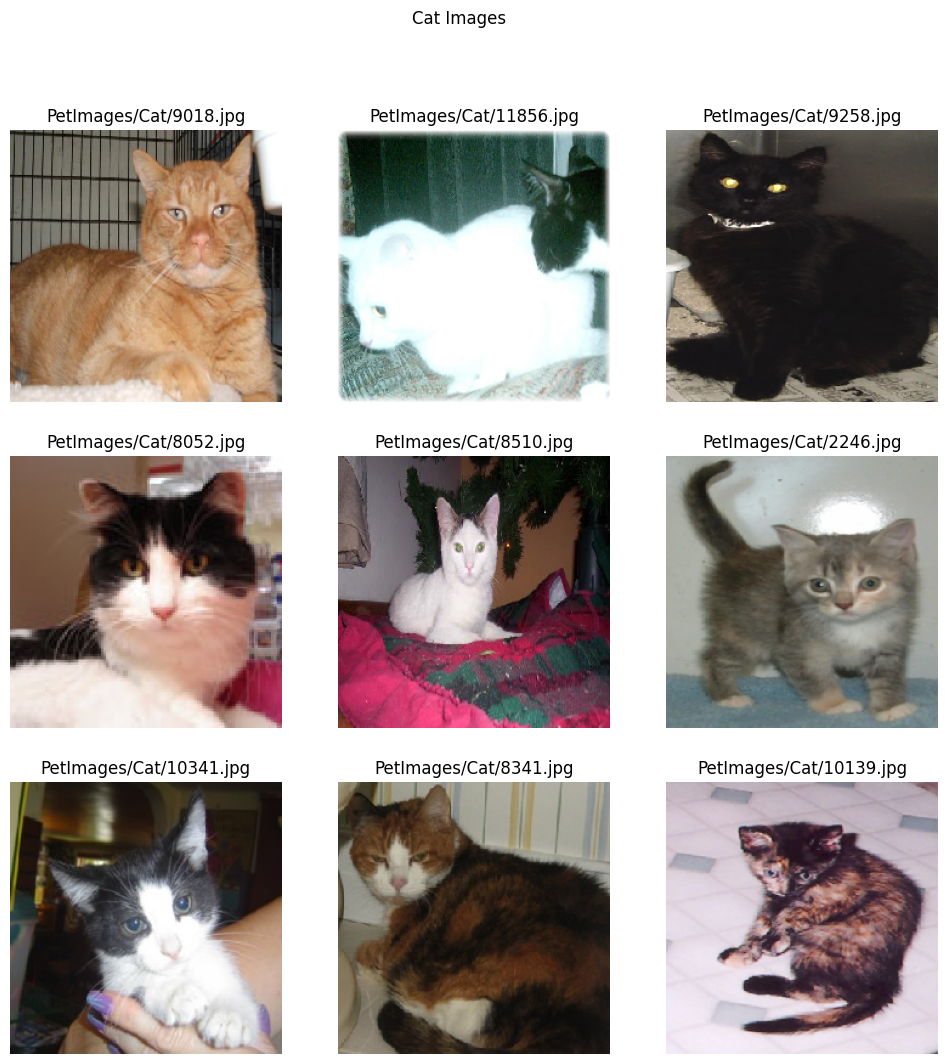

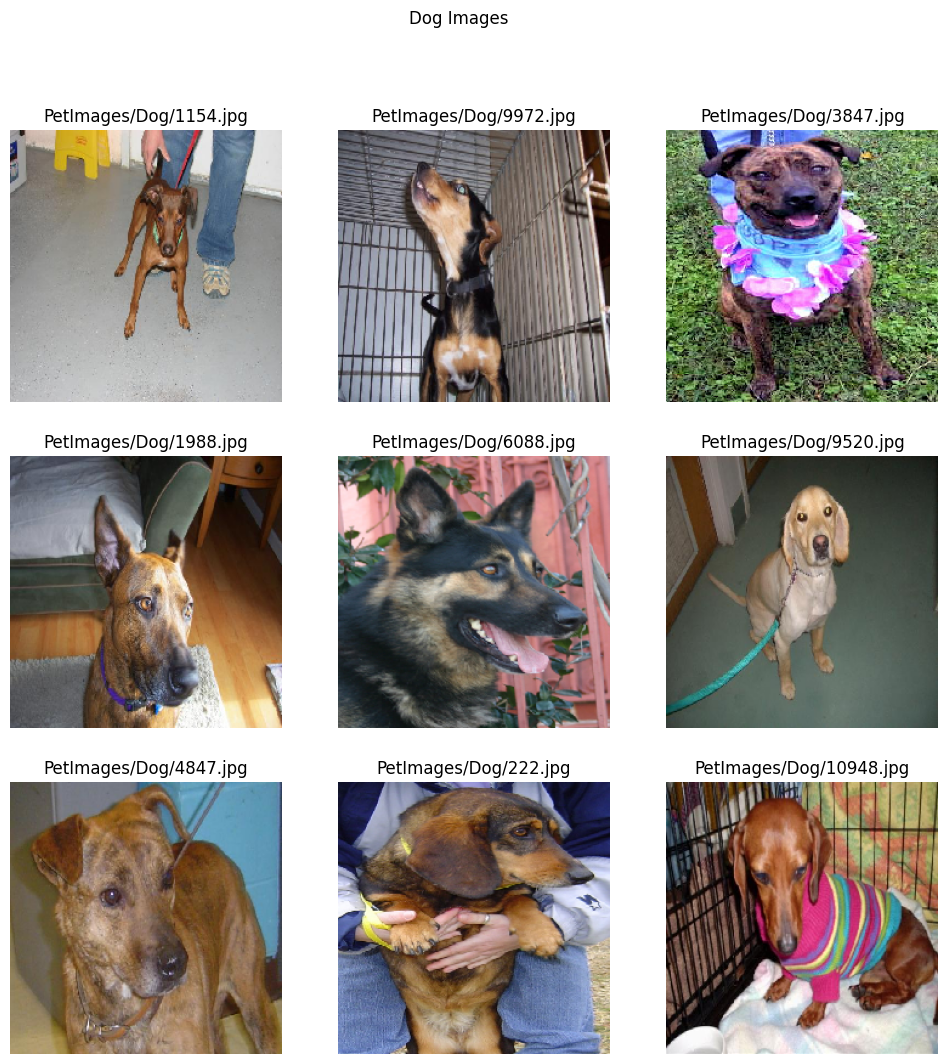

In [ ]:
# Define a function to display images
def display_images(images, title):
    plt.figure(figsize=(12, 12))
    for i, img_path in enumerate(images):
        plt.subplot(3, 3, i + 1)
        img = load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.title(img_path)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Get paths to cat and dog images
cat_images = [os.path.join(data_dir, 'Cat', img) for img in os.listdir(os.path.join(data_dir, 'Cat'))]
dog_images = [os.path.join(data_dir, 'Dog', img) for img in os.listdir(os.path.join(data_dir, 'Dog'))]

# Display some cat images
display_images(np.random.choice(cat_images, 9), title='Cat Images')

# Display some dog images
display_images(np.random.choice(dog_images, 9), title='Dog Images')


not all the images are of the same size so we cannot directly feed them to an AI Model

In [ ]:
# Get 4 random cat images
random_cat_images = np.random.choice(cat_images, 4)

# Load and print image shapes
for img_path in random_cat_images:
  try:
    img = cv2.imread(img_path)
    print(f"Image: {img_path}, Shape: {img.shape}")
  except:
    print(f"Failed to load image: {img_path}")


Image: PetImages/Cat/1173.jpg, Shape: (400, 300, 3)
Image: PetImages/Cat/9929.jpg, Shape: (343, 380, 3)
Image: PetImages/Cat/5773.jpg, Shape: (94, 300, 3)
Image: PetImages/Cat/10448.jpg, Shape: (262, 350, 3)


## Data Preprocessing

The `ImageDataGenerator` is a class provided by Keras to augment and preprocess image data in real-time during training. It allows you to apply transformations such as
- rescaling,
- rotation,
- zooming,
- flipping, and more.


In [ ]:
# importing ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "PetImages/"

# Creating an instance of ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)  # Use 20% of data for validation

In [ ]:
# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Create data generators for training and validation
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.



### Display Some Images

To ensure our preprocessing is working correctly, let's display some images from the training generator.


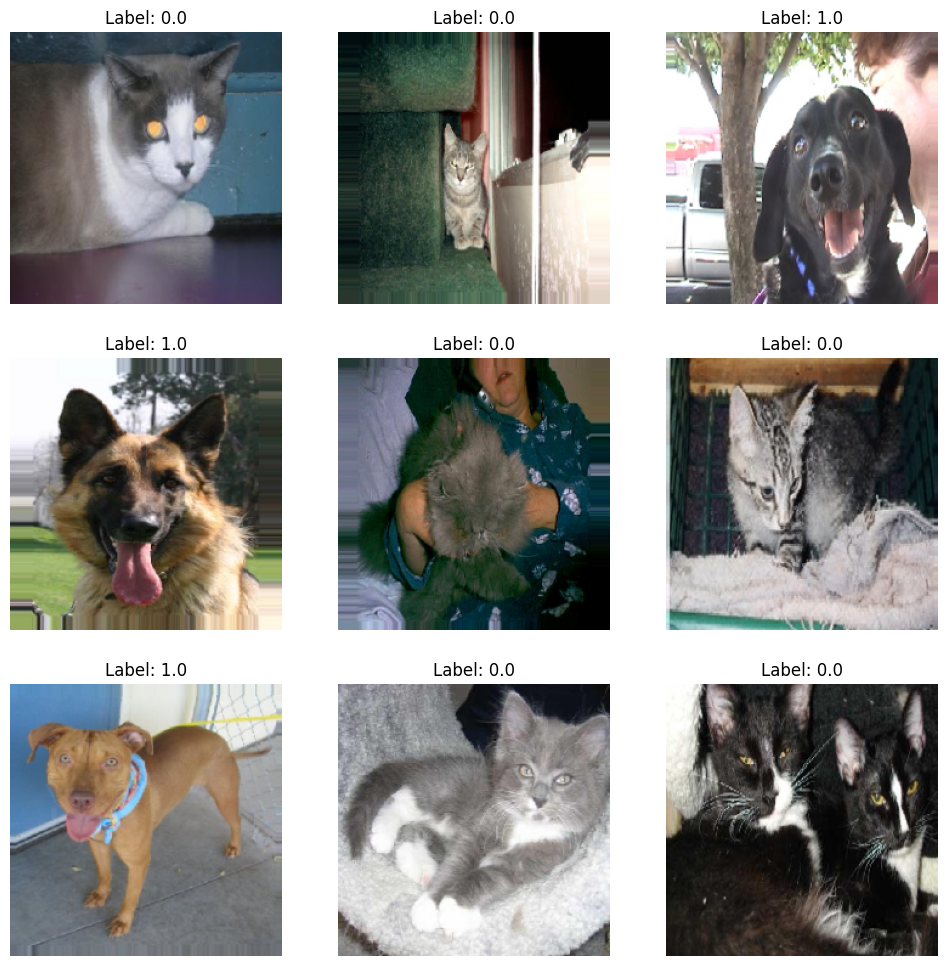

In [ ]:
# Function to display a batch of images
def display_batch_of_images(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_batch[i])
        plt.title(f"Label: {y_batch[i]}")
        plt.axis('off')
    plt.show()

# Display a batch of images from the training generator
display_batch_of_images(train_generator)

### more Explanation of the ImageDataGenerator Function (self learning):

The `ImageDataGenerator` class in Keras is used for real-time data augmentation and preprocessing of image data. It allows you to rescale pixel values, apply random transformations (like rotations, shifts, flips, etc.), and split data into training and validation sets, thereby helping improve the robustness and generalization of your model.

# Training

Now that we have set up the `ImageDataGenerator` and visualized some images, we can proceed with building and training a CNN model using the ResNet architecture for the cat-dog classification task.

using the following steps:
1. **Build the ResNet Model**
2. **Compile the Model**
3. **Train the Model**
4. **Evaluate the Model**

### 1. Build the ResNet Model

We'll use the pre-trained ResNet50 model and customize it for our binary classification task.


In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the pre-trained
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


**ImageNet** is formally a project aimed at (manually) labeling and categorizing images into almost 22,000 separate object categories for the purpose of computer vision research.

In [ ]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)  # Binary classification output

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
# model
model.name = "AI-Bauchi"
model.summary()


Model: "AI-Bauchi"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 51,381,249 (196.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


### 2. Compile the Model


In [ ]:
# Compile the model
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])


### 3. Training the Model

In [34]:
# Train the model
history = model.fit(train_generator,
                      steps_per_epoch=train_generator.samples // batch_size,
                      validation_data=validation_generator,
                      validation_steps=validation_generator.samples // batch_size,
                      epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 329s 507ms/step - accuracy: 0.5626 - loss: 1.5651 - val_accuracy: 0.6486 - val_loss: 0.6202
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6094
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 312s 496ms/step - accuracy: 0.6611 - loss: 0.6135 - val_accuracy: 0.6927 - val_loss: 0.5920
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.5857
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 327s 504ms/step - accuracy: 0.6680 - loss: 0.6113 - val_accuracy: 0.6793 - val_loss: 0.5903
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.4783
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 327s 513ms/step - accuracy: 0.6823 - loss: 0.5969 - val_accuracy: 0.5787 - val_loss: 0.6872
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7866
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 374s 501ms/step - accuracy:

### 4. Evaluate the Model


In [36]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 483ms/step - accuracy: 0.6897 - loss: 0.5781
Validation Loss: 0.5822144150733948
Validation Accuracy: 0.6870748400688171


In [41]:
!wget https://thumbs.dreamstime.com/z/golden-retriever-dog-21668976.jpg

--2024-08-07 10:45:32--  https://thumbs.dreamstime.com/z/golden-retriever-dog-21668976.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196653 (192K) [image/jpeg]
Saving to: ‘golden-retriever-dog-21668976.jpg’

golden-retriever-do 100%[===================>] 192.04K  --.-KB/s    in 0.02s   

2024-08-07 10:45:33 (9.10 MB/s) - ‘golden-retriever-dog-21668976.jpg’ saved [196653/196653]



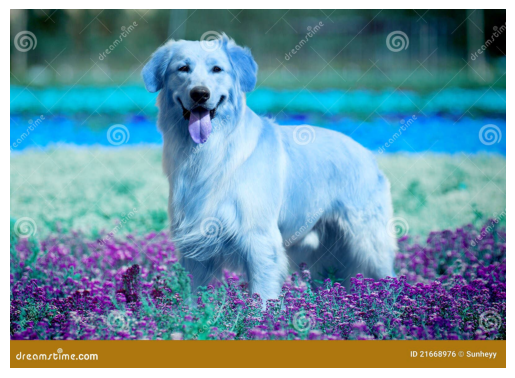

In [43]:
# Test
img = cv2.imread('golden-retriever-dog-21668976.jpg')


plt.imshow(img)
plt.axis('off')
plt.show()

In [44]:
img = cv2.resize(img, (224, 224))
img = img.reshape(1, 224, 224, 3)

In [45]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[1.]], dtype=float32)

Correctly Predicted it to be a dog